## Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
## read csv file
data=pd.read_csv("spamham.csv")

In [4]:
data.shape

(5572, 2)

In [6]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


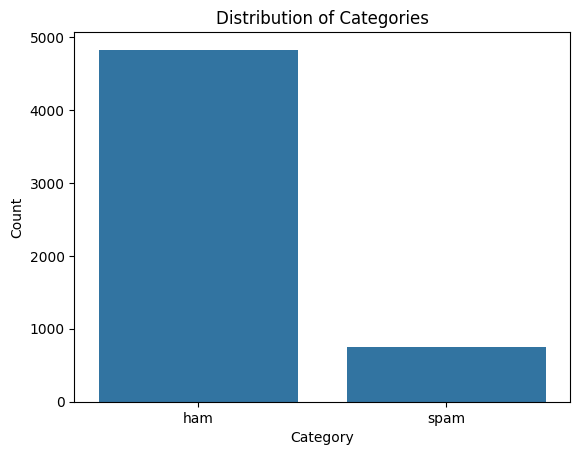

In [ ]:
# show distribution of categories
sns.countplot(x='Category', data=data)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# select data with not null values
mail_data = data.where((pd.notnull(data)),'')

In [ ]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0 
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [11]:
X = mail_data['Message']

Y = mail_data['Category']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [14]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

#The min_df=1 parameter means that words that appear in only one document (i.e., rare words) will be included in the features. 
#The stop_words='english' parameter removes common English stopwords (e.g., 'the', 'is', 'and') from the text data.
#The lowercase=True parameter converts all text to lowercase, ensuring that capitalization differences don't affect feature extraction.

X_train_features = feature_extraction.fit_transform(X_train)

#fit_transform method of the TfidfVectorizer are used to transform the training set X_train (which contains email text messages) into a matrix of TF-IDF features.
X_test_features = feature_extraction.transform(X_test)

#he transform method of the TfidfVectorizer to transform the test set X_test into TF-IDF features. Note that we only use the transform method for the test set; we do not fit the vectorizer again to avoid data leakage, as the vectorizer has already been fit on the training set

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# convert Y_train and Y_test values as integers

In [16]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [17]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
accuracy_on_training_data

0.9676912721561588

In [19]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
accuracy_on_test_data

0.9668161434977578

In [20]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors. The variable input_mail contains a list of text data representing new email messages. To make predictions using the trained Logistic Regression model, the text data needs to be converted into feature vectors using the same TfidfVectorizer 
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)

#print prediction

if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

Ham mail


In [22]:
input_mail = ["Congratulations! You've won a free luxury vacation trip to an exotic island. Click the link to claim your prize now!"]

# Convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Making prediction
prediction = model.predict(input_data_features)

if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')

Spam mail
